# Case 19
Миклошевич Глеб

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, plot_roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import xgboost as xgb

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("bank.csv", sep=";")

In [ ]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [ ]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Все данные выглядят хорошо

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Ещё и пропусков нет, хотя было заметно, что в некоторых полях есть статус unknown

отлично, нулевых значений нет, хотя, как было видно, есть значения unknown

# Вглядывание в данные

Text(0.5, 0, 'target')

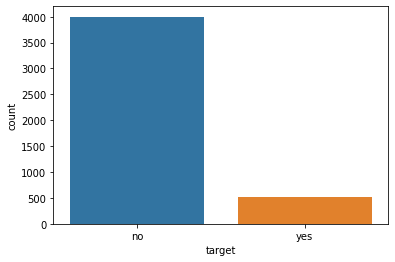

In [ ]:
sns.countplot(x=df.y)
plt.xlabel("target")

Датасет сильно разбалансирован, поэтому вероятно понадобиться балансировка

Посмотрим на зависимость от возраста и баланса

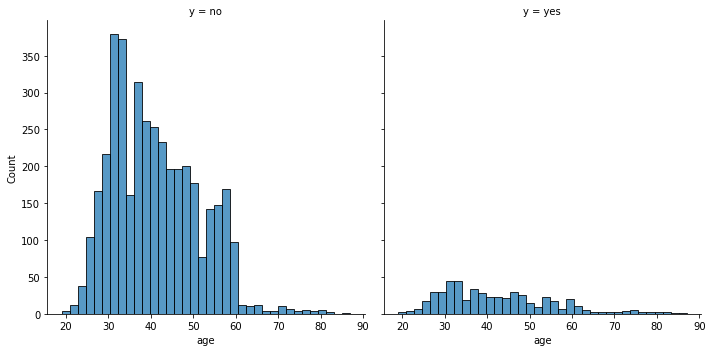

In [ ]:
sns.displot(
    data=df, x="age",
    col="y"
)

Учитывая дисбаланс классов, графики пропорционально похожи

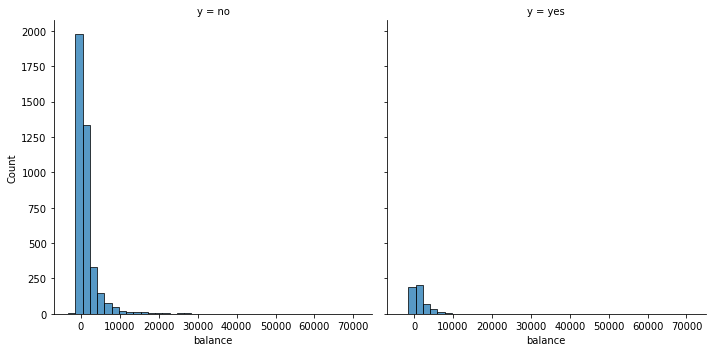

In [ ]:
sns.displot(
    data=df, x="balance",
    col="y", bins=40
)

Посмтотрим на бинарные категориальные данные и просто категориальные

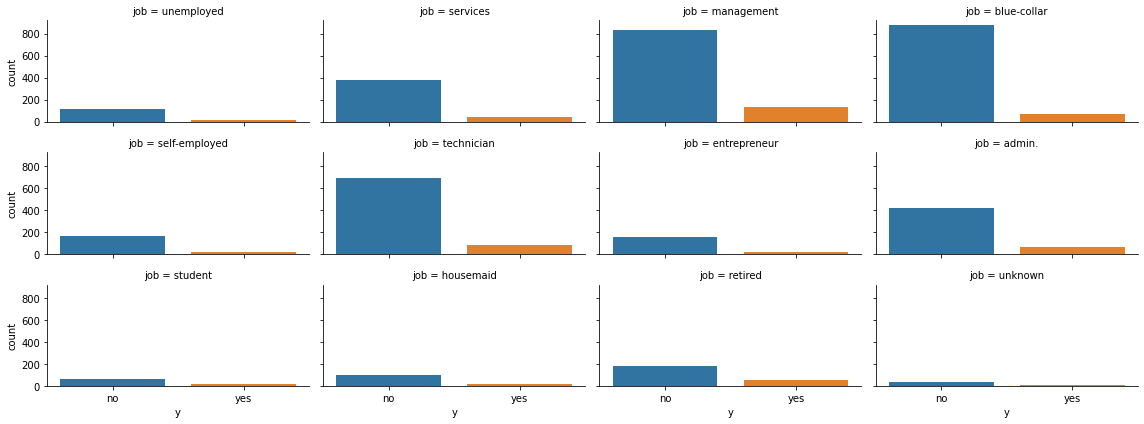

In [ ]:
sns.catplot(
    data=df[df.job.notnull()], col="job", x="y", kind="count", col_wrap=4, height=2, aspect=2
)

сразу заметно, что у людей на пенсии y пропорционлаьно больше.
У менеджеров конверсия поле y значительно больше представлено единицей 

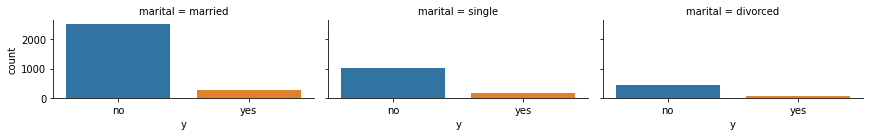

In [ ]:
sns.catplot(
    data=df[df.job.notnull()], col="marital", x="y", kind="count", col_wrap=4, height=2, aspect=2
)

У одиноких пропорционально выше шанс 1 в целевой колонке

In [ ]:
sns.catplot(
    data=df[df.job.notnull()], col="default", x="y", kind="count", col_wrap=4, height=2, aspect=2
)

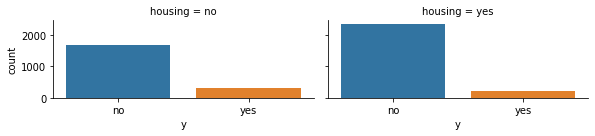

In [ ]:
sns.catplot(
    data=df[df.job.notnull()], col="housing", x="y", kind="count", col_wrap=4, height=2, aspect=2
)

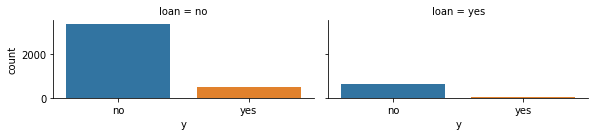

In [ ]:
sns.catplot(
    data=df[df.job.notnull()], col="loan", x="y", kind="count", col_wrap=4, height=2, aspect=2
)

Отсутствие задолжености повышает процент единиц в целевом поле. Можно предположить, что целевая колонка напрямую связана с деньгами, а не банковской страховкой, которая есть у многих людей с кредитами. 
Я думаю, что целевая колонка - **шанс успешного открытия нового счет в банке или взятия кредита**(возможно повторного)

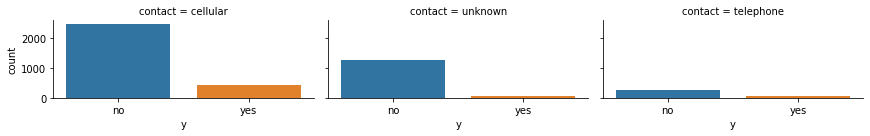

In [ ]:
sns.catplot(
    data=df[df.job.notnull()], col="contact", x="y", kind="count", col_wrap=4, height=2, aspect=2
)

Можно предположить, что данные достаточно не самые свежие, поскольку стационарными телефонами пользуются не так много людей в последние 10 лет

In [ ]:
sns.catplot(
    data=df[df.job.notnull()], col="poutcome", x="y", kind="count", col_wrap=4, height=2, aspect=2
)

Такого слова вообще нет, наверное это исход, непонятно исход чего, правдаimage.png

In [ ]:
corr_matrix = df.corr(method="spearman")

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True);

корелляция между признаками previous и pdays почти 1, поэтому можно выкинуть это значение

# Encoding the data

дропаем previous

In [ ]:
df.drop(columns=['previous'], inplace=True)

### Categorical values

In [ ]:
# enc = OneHotEncoder()

In [ ]:
categorical_features = ["job", "marital", "education", "contact",  "poutcome"]
numerical_features = ["age", "balance", "duration", "campaign", "pdays"]
bin_features = ["default", "housing", "loan"]
target = ["y"]

In [ ]:
catergorical_df = pd.DataFrame()
for cf in list(df.columns):
    if cf in categorical_features:
        cat_df = pd.get_dummies(df[cf], prefix=cf)
        if catergorical_df.empty:
            catergorical_df = cat_df
        else:
            print(cf)
            catergorical_df = catergorical_df.join(cat_df)


marital
education
contact
poutcome


In [ ]:
catergorical_df.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [ ]:
catergorical_df

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0              0                0                 0              0   
1              0                0                 0              0   
2              0                0                 0              0   
3              0                0                 0              0   
4              0                1                 0              0   
...          ...              ...               ...            ...   
4516           0                0                 0              0   
4517           0                0                 0              0   
4518           0                0                 0              0   
4519           0                1                 0              0   
4520           0                0                 1              0   

      job_management  job_retired  job_self-employed  job_services  \
0                  0            0                  0             0   
1                  0            0                  0             1   
2                  1            0                  0             0   
3                  1            0                  0             0   
4                  0            0                  0             0   
...              ...          ...                ...           ...   
4516               0            0                  0             1   
4517               0            0                  1             0   
4518               0            0                  0             0   
4519               0            0                  0             0   
4520               0            0                  0             0   

      job_student  job_technician  ...  education_secondary  \
0               0               0  ...                    0   
1               0               0  ...                    1   
2               0               0  ...                    0   
3               0               0  ...                    0   
4               0               0  ...                    1   
...           ...             ...  ...                  ...   
4516            0               0  ...                    1   
4517            0               0  ...                    0   
4518            0               1  ...                    1   
4519            0               0  ...                    1   
4520            0               0  ...                    0   

      education_tertiary  education_unknown  contact_cellular  \
0                      0                  0                 1   
1                      0                  0                 1   
2                      1                  0                 1   
3                      1                  0                 0   
4                      0                  0                 0   
...                  ...                ...               ...   
4516                   0                  0                 1   
4517                   1                  0                 0   
4518                   0                  0                 1   
4519                   0                  0                 1   
4520                   1                  0                 1   

      contact_telephone  contact_unknown  poutcome_failure  poutcome_other  \
0                     0                0                 0               0   
1                     0                0                 1               0   
2                     0                0                 1               0   
3                     0                1                 0               0   
4                     0                1                 0               0   
...                 ...              ...               ...             ...   
4516                  0                0                 0               0   
4517                  0                1                 0               0   
4518                  0                0                 0               0   
4519  

### Numerical values

In [ ]:
ss = StandardScaler()
numerical_df = df[numerical_features]

scaled_features = numerical_df.values
# scaled_features = StandardScaler().fit_transform(numerical_df.values)
numerical_df_scaled = pd.DataFrame(scaled_features, index=numerical_df.index, columns=numerical_df.columns)

Без StandardScaler'а работает чуть лучше, поэтому я его убрал.
Предполагаю, что деревьям сложнее разделить параметры

In [ ]:
numerical_df_scaled

age  balance  duration  campaign  pdays
0      30     1787        79         1     -1
1      33     4789       220         1    339
2      35     1350       185         1    330
3      30     1476       199         4     -1
4      59        0       226         1     -1
...   ...      ...       ...       ...    ...
4516   33     -333       329         5     -1
4517   57    -3313       153         1     -1
4518   57      295       151        11     -1
4519   28     1137       129         4    211
4520   44     1136       345         2    249

[4521 rows x 5 columns]

### Bool values

In [ ]:
boolean_df = df[bin_features]

In [ ]:
boolean_df = boolean_df.apply(lambda boolean_df: np.where (boolean_df == 'yes', 1, 0))
boolean_df[list(boolean_df.columns)] = boolean_df[list(boolean_df.columns)].apply(pd.to_numeric)

In [ ]:
boolean_df.describe()

default      housing         loan
count  4521.000000  4521.000000  4521.000000
mean      0.016810     0.566025     0.152842
std       0.128575     0.495676     0.359875
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     1.000000     0.000000
75%       0.000000     1.000000     0.000000
max       1.000000     1.000000     1.000000

In [ ]:
list(boolean_df.columns)

['default', 'housing', 'loan']

### Target 

In [ ]:
target_df = df[target]

target_df = target_df.apply(lambda target_df: np.where (target_df == 'yes', 1, 0))
target_df[list(target_df.columns)] = target_df[list(target_df.columns)].apply(pd.to_numeric)

In [ ]:
target_df.describe()

y
count  4521.000000
mean      0.115240
std       0.319347
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

### merging everything

In [ ]:
X_df = catergorical_df
X_df = X_df.join(numerical_df_scaled)
X_df = X_df.join(boolean_df) 

X = X_df.to_numpy()

In [ ]:
X_df

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0              0                0                 0              0   
1              0                0                 0              0   
2              0                0                 0              0   
3              0                0                 0              0   
4              0                1                 0              0   
...          ...              ...               ...            ...   
4516           0                0                 0              0   
4517           0                0                 0              0   
4518           0                0                 0              0   
4519           0                1                 0              0   
4520           0                0                 1              0   

      job_management  job_retired  job_self-employed  job_services  \
0                  0            0                  0             0   
1                  0            0                  0             1   
2                  1            0                  0             0   
3                  1            0                  0             0   
4                  0            0                  0             0   
...              ...          ...                ...           ...   
4516               0            0                  0             1   
4517               0            0                  1             0   
4518               0            0                  0             0   
4519               0            0                  0             0   
4520               0            0                  0             0   

      job_student  job_technician  ...  poutcome_success  poutcome_unknown  \
0               0               0  ...                 0                 1   
1               0               0  ...                 0                 0   
2               0               0  ...                 0                 0   
3               0               0  ...                 0                 1   
4               0               0  ...                 0                 1   
...           ...             ...  ...               ...               ...   
4516            0               0  ...                 0                 1   
4517            0               0  ...                 0                 1   
4518            0               1  ...                 0                 1   
4519            0               0  ...                 0                 0   
4520            0               0  ...                 0                 0   

      age  balance  duration  campaign  pdays  default  housing  loan  
0      30     1787        79         1     -1        0        0     0  
1      33     4789       220         1    339        0        1     1  
2      35     1350       185         1    330        0        1     0  
3      30     1476       199         4     -1        0        1     1  
4      59        0       226         1     -1        0        1     0  
...   ...      ...       ...       ...    ...      ...      ...   ...  
4516   33     -333       329         5     -1        0        1     0  
4517   57    -3313       153         1     -1        1        1     1  
4518   57      295       151        11     -1        0        0     0  
4519   28     1137       129         4    211        0        0     0  
4520   44     1136       345         2    249        0        1     1  

[4521 rows x 34 columns]

In [ ]:
full_df = X_df.copy().join(target_df)
corr_matrix = full_df.corr(method="spearman")

plt.figure(figsize=(22, 14))
sns.heatmap(
    corr_matrix[["y"]].T, annot=True,
    cbar_kws={"orientation": "horizontal"},
    square=True
)

# Training

## Обучим логистическую регрессию и посмотрим на статистически значимые параметры

In [ ]:
y = target_df.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.249641
         Iterations 12


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3616
Model:                          Logit   Df Residuals:                     3586
Method:                           MLE   Df Model:                           29
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                  0.3082
Time:                        08:23:56   Log-Likelihood:                -902.70
converged:                       True   LL-Null:                       -1304.9
Covariance Type:            nonrobust   LLR p-value:                1.397e-150
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            19.7447        nan        nan        nan         nan         nan
x2            19.2576        nan        nan        nan         nan         nan
x3            18.6987        nan        nan        n

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


Статистически значимые переменные на уровне α=0.05:

* x29
* x30
* x32
* x33
* x34

In [ ]:
# print(X_df.columns[26])
print(X_df.columns[28])
print(X_df.columns[29])
print(X_df.columns[30])
# print(X_df.columns[31])
print(X_df.columns[32])
print(X_df.columns[33])


duration
campaign
pdays
housing
loan


predicting 

In [ ]:
predicted_1 = log_reg.predict(X_test)
prediction_1 = list(map(round, predicted_1))

In [ ]:
cm = confusion_matrix(y_test, prediction_1)

In [ ]:
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[789  18]
 [ 71  27]]


In [ ]:
print('Test accuracy = ', accuracy_score(y_test, prediction_1))

Test accuracy =  0.901657458563536


In [ ]:
print("Classification report")
print(classification_report(y_test, prediction_1))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



### New try with only significant params

In [ ]:
X_df_2 = X_df[["duration", "campaign", "pdays", "housing", "loan"]] 
X2 = X_df_2.to_numpy()

In [ ]:
X_df_2

duration  campaign  pdays  housing  loan
0           79         1     -1        0     0
1          220         1    339        1     1
2          185         1    330        1     0
3          199         4     -1        1     1
4          226         1     -1        1     0
...        ...       ...    ...      ...   ...
4516       329         5     -1        1     0
4517       153         1     -1        1     1
4518       151        11     -1        0     0
4519       129         4    211        0     0
4520       345         2    249        1     1

[4521 rows x 5 columns]

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.20, random_state=42)

In [ ]:
log_reg2 = sm.Logit(y_train2, X_train2).fit()

Optimization terminated successfully.
         Current function value: 0.349634
         Iterations 8


In [ ]:
print(log_reg2.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3616
Model:                          Logit   Df Residuals:                     3611
Method:                           MLE   Df Model:                            4
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                 0.03112
Time:                        09:16:43   Log-Likelihood:                -1264.3
converged:                       True   LL-Null:                       -1304.9
Covariance Type:            nonrobust   LLR p-value:                 9.613e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0022      0.000     12.261      0.000       0.002       0.002
x2            -0.6953      0.037    -18.695      0.000      -0.768      -0.622
x3             0.0009      0.000      1.798      0.0

In [ ]:
predicted_2 = log_reg2.predict(X_test2)
prediction_2 = list(map(round, predicted_2))

In [ ]:
cm2 = confusion_matrix(y_test2, prediction_2)
print ("Confusion Matrix : \n", cm2) 

Confusion Matrix : 
 [[783  24]
 [ 80  18]]


In [ ]:
print("Classification report")
print(classification_report(y_test2, prediction_2))

Classification report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.43      0.18      0.26        98

    accuracy                           0.89       905
   macro avg       0.67      0.58      0.60       905
weighted avg       0.86      0.89      0.86       905



## Обучим RandomForest 
Пустой фаил RandomForest.docx лежал рядом с csv фаилом

Используется RandomForestRegressor вместо RandomForestClassifier, чтобы получать мягкую классификацию, а не жесткую. Результаты обычно совпадают, если использовать threshold в 0.5 (y >= 0.5 ? 1 : 0)

In [ ]:
rf = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=42)

In [ ]:
rf.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [ ]:
prediction_rf1 = rf.predict(X_test2)

In [ ]:
prediction_rf1[np.where(prediction_rf1 > 0.5)]

array([0.5838705 , 0.64239358, 0.55550117, 0.51493772, 0.57665991,
       0.55265158, 0.6223939 , 0.57478829, 0.52264293, 0.52941453,
       0.65187157, 0.55976417, 0.602834  , 0.51235606, 0.54526136,
       0.59336387, 0.60032761, 0.54076034, 0.50249848, 0.56635215,
       0.51306745, 0.55266815, 0.63219898, 0.50096987, 0.57208212,
       0.53273447, 0.58377544, 0.60050991, 0.51560263, 0.57832353,
       0.59087359, 0.61146872, 0.57070016, 0.71723928, 0.5800394 ])

In [ ]:
prediction_rf1_fixed = prediction_rf1.copy()
prediction_rf1_fixed[np.where(prediction_rf1 >= 0.5)] = 1
prediction_rf1_fixed[np.where(prediction_rf1 < 0.5)] = 0


In [ ]:
print("RF classification report")
print(classification_report(y_test2, prediction_rf1_fixed))

RF classification report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.49      0.17      0.26        98

    accuracy                           0.89       905
   macro avg       0.70      0.58      0.60       905
weighted avg       0.86      0.89      0.87       905



Показатели сильно упали. Попробуем сбаласировать выборку с помощью under- и over- sampling

In [ ]:
target_df

y
0     0
1     0
2     0
3     0
4     0
...  ..
4516  0
4517  0
4518  0
4519  0
4520  0

[4521 rows x 1 columns]

### Undersampling


In [ ]:
rus = RandomUnderSampler(random_state=42)

In [ ]:
X_undersampled, y_undersampled = rus.fit_resample(X_train2, y_train2)

In [ ]:
print(f"before undersampling. Class one: {y_train2.sum()}. Overall: {y_train2.size}")
print(f"After undersampling. Class one: {y_undersampled.sum()}. Overall: {y_undersampled.size}")

before undersampling. Class one: 423. Overall: 3616
After undersampling. Class one: 423. Overall: 846


In [ ]:
rf_undersampled = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=42)
rf_undersampled.fit(X_undersampled, y_undersampled)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [ ]:
prediction_rfu = rf_undersampled.predict(X_test2)
prediction_rfu_fixed = prediction_rfu.copy()
prediction_rfu_fixed[np.where(prediction_rfu_fixed >= 0.5)] = 1
prediction_rfu_fixed[np.where(prediction_rfu_fixed < 0.5)] = 0

In [ ]:
print("undersampled RF classification report")
print(classification_report(y_test2, prediction_rfu_fixed))

undersampled RF classification report
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       807
           1       0.35      0.78      0.48        98

    accuracy                           0.82       905
   macro avg       0.66      0.80      0.69       905
weighted avg       0.90      0.82      0.85       905



In [ ]:
cm_rfu = confusion_matrix(y_test2, prediction_rfu_fixed)
print ("Confusion Matrix : \n", cm_rfu) 

Confusion Matrix : 
 [[652 155]
 [ 21  77]]


### Oversampling

In [ ]:
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train2, y_train2)

In [ ]:
print(f"before oversampling. Class one: {y_train2.sum()}. Overall: {y_train2.size}")
print(f"After oversampling. Class one: {y_oversampled.sum()}. Overall: {y_oversampled.size}")

before oversampling. Class one: 423. Overall: 3616
After oversampling. Class one: 3193. Overall: 6386


Опять же, классы получаются сбалансированными

In [ ]:
rf_oversampled = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=42)
rf_oversampled.fit(X_oversampled, y_oversampled)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [ ]:
prediction_rfo = rf_oversampled.predict(X_test2)
prediction_rfo_fixed = prediction_rfo.copy()
prediction_rfo_fixed[np.where(prediction_rfo_fixed >= 0.5)] = 1
prediction_rfo_fixed[np.where(prediction_rfo_fixed < 0.5)] = 0

In [ ]:
print("Oversampled RF classification report")
print(classification_report(y_test2, prediction_rfo_fixed))

Oversampled RF classification report
              precision    recall  f1-score   support

           0       0.97      0.82      0.88       807
           1       0.33      0.77      0.47        98

    accuracy                           0.81       905
   macro avg       0.65      0.79      0.68       905
weighted avg       0.90      0.81      0.84       905



In [ ]:
cm_rfo = confusion_matrix(y_test2, prediction_rfo_fixed)
print ("Confusion Matrix : \n", cm_rfo) 

Confusion Matrix : 
 [[658 149]
 [ 23  75]]


### Oversampling and undersampling

In [ ]:
smote_enn  = SMOTEENN(random_state=42)
X_ousampled, y_ousampled = smote_enn  .fit_resample(X_train2, y_train2)

In [ ]:
print(f"before ousampling. Class one: {y_train2.sum()}. Overall: {y_train2.size}")
print(f"After ousampling. Class one: {y_ousampled.sum()}. Overall: {y_ousampled.size}")

before ousampling. Class one: 423. Overall: 3616
After ousampling. Class one: 2430. Overall: 4552


Опять же, классы получаются сбалансированными

In [ ]:
rf_ousampled = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=42)
rf_ousampled.fit(X_ousampled, y_ousampled)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [ ]:
prediction_rfou = rf_ousampled.predict(X_test2)
prediction_rfou_fixed = prediction_rfou.copy()
prediction_rfou_fixed[np.where(prediction_rfou_fixed >= 0.5)] = 1
prediction_rfou_fixed[np.where(prediction_rfou_fixed < 0.5)] = 0

In [ ]:
print("Over&Under sampled RF classification report")
print(classification_report(y_test2, prediction_rfou_fixed))

Over&Under sampled RF classification report
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       807
           1       0.31      0.85      0.45        98

    accuracy                           0.78       905
   macro avg       0.64      0.81      0.66       905
weighted avg       0.90      0.78      0.82       905



In [ ]:
cm_rfou = confusion_matrix(y_test2, prediction_rfou_fixed)
print ("Confusion Matrix : \n", cm_rfou) 

Confusion Matrix : 
 [[620 187]
 [ 15  83]]


Проверим логистическую регрессию на тех же самых данных

In [ ]:
log_reg_ou = sm.Logit(y_ousampled, X_ousampled).fit()

Optimization terminated successfully.
         Current function value: 0.273280
         Iterations 8


In [ ]:
print(log_reg_ou.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4552
Model:                          Logit   Df Residuals:                     4545
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                  0.6044
Time:                        08:24:04   Log-Likelihood:                -1244.0
converged:                       True   LL-Null:                       -3144.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0267      0.002    -12.583      0.000      -0.031      -0.023
x2             0.0106      0.000     28.725      0.000       0.010       0.011
x3            -0.4619      0.032    -14.311      0.0

In [ ]:
predicted_lg_ou = log_reg_ou.predict(X_test2)
predicted_lg_ou = list(map(round, predicted_lg_ou))

In [ ]:
cm_lg_ou = confusion_matrix(y_test2, predicted_lg_ou)
print ("Confusion Matrix : \n", cm_lg_ou) 

Confusion Matrix : 
 [[632 175]
 [ 18  80]]


In [ ]:
print("Logicstic regression OU classification report")
print(classification_report(y_test2, predicted_lg_ou))

Logicstic regression OU classification report
              precision    recall  f1-score   support

           0       0.97      0.78      0.87       807
           1       0.31      0.82      0.45        98

    accuracy                           0.79       905
   macro avg       0.64      0.80      0.66       905
weighted avg       0.90      0.79      0.82       905



### Тест XGBoost

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_ousampled, y_ousampled)

XGBClassifier()

In [ ]:
predicted_xgb = xgb_clf.predict(X_test2)

In [ ]:
cm_xgb = confusion_matrix(y_test2, predicted_xgb)
print ("Confusion Matrix : \n", cm_xgb) 

Confusion Matrix : 
 [[649 158]
 [ 22  76]]


In [ ]:
print("XGB classification report")
print(classification_report(y_test2, predicted_xgb))

XGB classification report
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       807
           1       0.32      0.78      0.46        98

    accuracy                           0.80       905
   macro avg       0.65      0.79      0.67       905
weighted avg       0.90      0.80      0.83       905



Gradient Boosting Classifier from Scikit learn

In [ ]:
sl_clf = GradientBoostingRegressor(n_estimators=300)
sl_clf.fit(X_ousampled, y_ousampled)

GradientBoostingRegressor(n_estimators=300)

In [ ]:
predicted_sl_clf = sl_clf.predict(X_test2)
predicted_sl_clf_fixed = predicted_sl_clf.copy()
predicted_sl_clf_fixed[np.where(predicted_sl_clf_fixed >= 0.5)] = 1
predicted_sl_clf_fixed[np.where(predicted_sl_clf_fixed < 0.5)] = 0

In [ ]:
cm_sl_clf = confusion_matrix(y_test2, predicted_sl_clf_fixed)
print ("Confusion Matrix : \n", cm_sl_clf) 

Confusion Matrix : 
 [[660 147]
 [ 21  77]]


In [ ]:
print("SL Gradient Boosting classification report")
print(classification_report(y_test2, predicted_sl_clf_fixed))

SL Gradient Boosting classification report
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       807
           1       0.34      0.79      0.48        98

    accuracy                           0.81       905
   macro avg       0.66      0.80      0.68       905
weighted avg       0.90      0.81      0.84       905



### Тесты лучшего классификатора

Я бы выбрал GradientBoostingRegressor из Scikit, но фаил RandomForest.docx **намекает**, что надо использовать именно лес, поэтому выберу его, как окончательный вариант, но я бы взял Градиентый бустинг.

Лучшим среди всех оказался RF с оверсэмплингом и андерсэмплингом. Повторю тоже самое, только на всех признаках (без отбора)

In [ ]:
smote_enn  = SMOTEENN(random_state=42)
full_X_ousampled, full_y_ousampled = smote_enn.fit_resample(X_train, y_train)

In [ ]:
print(f"before ousampling. Class one: {y_train.sum()}. Overall: {y_train.size}")
print(f"After ousampling. Class one: {full_y_ousampled.sum()}. Overall: {full_y_ousampled.size}")

before ousampling. Class one: 423. Overall: 3616
After ousampling. Class one: 2494. Overall: 4696


In [ ]:
rf_ousampled_full = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=42)
rf_ousampled_full.fit(full_X_ousampled, full_y_ousampled)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [ ]:
prediction_full_rfou = rf_ousampled_full.predict(X_test)
prediction_full_rfou_fixed = prediction_full_rfou.copy()
prediction_full_rfou_fixed[np.where(prediction_full_rfou_fixed >= 0.5)] = 1
prediction_full_rfou_fixed[np.where(prediction_full_rfou_fixed < 0.5)] = 0

In [ ]:
print("Over&Under sampled RF classification report with every param")
print(classification_report(y_test, prediction_full_rfou_fixed))

Over&Under sampled RF classification report with every param
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       807
           1       0.37      0.73      0.49        98

    accuracy                           0.84       905
   macro avg       0.67      0.79      0.70       905
weighted avg       0.90      0.84      0.86       905



In [ ]:
cm_full_rfou = confusion_matrix(y_test, prediction_full_rfou_fixed)
print ("Confusion Matrix : \n", cm_full_rfou) 

Confusion Matrix : 
 [[685 122]
 [ 26  72]]


Построим график ошибок первого и второго рода в зависимости от трешхолда

In [ ]:
first_type_error = []
second_type_error = []
prediction_full_rfou_train = rf_ousampled_full.predict(full_X_ousampled)
for i in range(100):
    # temp_prediction = prediction_full_rfou.copy()
    temp_prediction = prediction_full_rfou_train.copy()
    temp_prediction[np.where(temp_prediction >= i/100)] = 1
    temp_prediction[np.where(temp_prediction < i/100)] = 0
    temp_cm = confusion_matrix(full_y_ousampled, temp_prediction)
    # temp_cm = confusion_matrix(y_test, temp_prediction)
    first_type_error.append(temp_cm[0, 1])
    second_type_error.append(temp_cm[1, 0])
    # if 44 < i < 56:
    #   print(f"threshold: 0.{i}",'\n', temp_cm)




In [ ]:
plt.figure(figsize=(24, 12))
plt.plot(first_type_error, label="ошибка первого рода")
plt.plot(second_type_error, label="ошибка второго рода")
plt.xlabel("Трешхолд 1/X")
plt.ylabel("Количество ошибок")
plt.legend(loc=1)
plt.title("Зависимость ошибок первого и второго рода от трешхолда")
plt.grid()
plt.show()

Если минимизировать ошибки первго рода, то сильно вырастает количетсво ошибок второго рода. Был выбран трешхолд в 0.49

In [ ]:
threshold = 0.49

Предсказания с новым трешходлом

In [ ]:
prediction_full_rfou = rf_ousampled_full.predict(X_test)
prediction_full_rfou_fixed_nt = prediction_full_rfou.copy()
prediction_full_rfou_fixed_nt[np.where(prediction_full_rfou_fixed_nt >= threshold)] = 1
prediction_full_rfou_fixed_nt[np.where(prediction_full_rfou_fixed_nt < threshold)] = 0

In [ ]:
print("Over&Under sampled RF classification report with every param")
print(classification_report(y_test, prediction_full_rfou_fixed_nt))

Over&Under sampled RF classification report with every param
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       807
           1       0.36      0.74      0.49        98

    accuracy                           0.83       905
   macro avg       0.66      0.79      0.69       905
weighted avg       0.90      0.83      0.85       905



In [ ]:
cm_full_rfou = confusion_matrix(y_test, prediction_full_rfou_fixed_nt)
print ("Confusion Matrix : \n", cm_full_rfou) 

Confusion Matrix : 
 [[678 129]
 [ 25  73]]


In [ ]:
sum(y_test)

array([98])

In [ ]:
roc_curve(y_test, prediction_full_rfou_fixed_nt)

(array([0.       , 0.1598513, 1.       ]),
 array([0.        , 0.74489796, 1.        ]),
 array([2., 1., 0.]))

ROC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_full_rfou_fixed_nt)

In [ ]:
roc_auc = auc(fpr, tpr)
roc_auc

0.792523329034216

In [ ]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

## Вывод

В ходе исследования, была выбрана и обучена модель для предсказания целевого столбца. Чтобы ее использовать необходимо также преобразовать данные, подобным образом.

В данный момент времени, использование модели ограничено, поскольку неизвестна "стоимость ошибок" первого и второго рода, поэтому необходима корректировка трешхолда для оптимизации ошибок. Анализ модели и сравнение ее с текущим методом определения целевой выборки.
Также перед использованием необходимо будет создать пайплайн для обработки данных